In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train = pd.read_csv('data/train.csv', index_col = 'PassengerId')
type(train)

pandas.core.frame.DataFrame

In [5]:
train.head()   # 상위 n개(디폴트값 5)
#train.tail()  # 하위 n개(디폴트값 5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# dataframe 구조 확인
train.shape # 891행 11열

(891, 11)

In [9]:
# 데이터 확인. Age, Cavin, Embarked에서 결측치 확인 가능
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
# 결측치를 좀더 보기 편하게 확인하기
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
# 생존자 성별의 수
survived_1 = train[train['Survived'] == 1].loc[:,'Sex'].value_counts()

# 사망자 성별의 수
survived_0 = train[train['Survived'] == 0].loc[:,'Sex'].value_counts()

print(survived_1, type(survived_1))
print(survived_0, type(survived_0))

female    233
male      109
Name: Sex, dtype: int64 <class 'pandas.core.series.Series'>
male      468
female     81
Name: Sex, dtype: int64 <class 'pandas.core.series.Series'>


In [16]:
df = pd.DataFrame([survived_1, survived_0], index = ['survived', 'dead'])
df

,female,male
survived,233,109
dead,81,468


<AxesSubplot:>

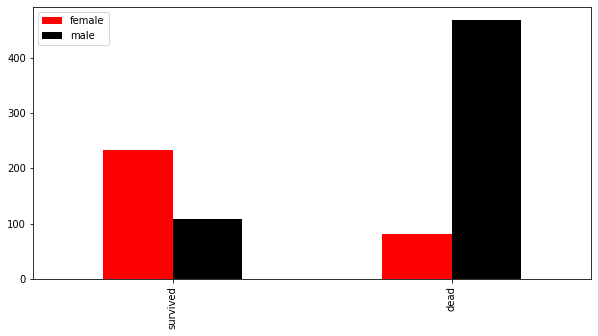

In [17]:
df.plot(kind = 'bar', figsize = (10,5), color = ['red', 'black'])
#df.plot(kind = 'bar', figsize = (10,5), stacked = True)

->> 남자가 월등히 많이 사망

In [34]:
# 차트 함수 선언
def bar_chart(columns):
    a = train[train['Survived'] == 1].loc[:,columns].value_counts()
    b = train[train['Survived'] == 0].loc[:,columns].value_counts()
    
    df = pd.DataFrame([a,b], index = ['Survived', 'Dead'])
    df.plot(kind = 'bar', figsize = (10,5))
    plt.show()

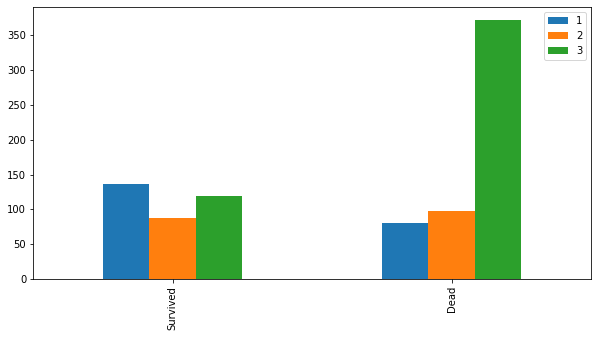

In [35]:
bar_chart('Pclass')

->> 3번 class에 탄 사람들이 많이 사망

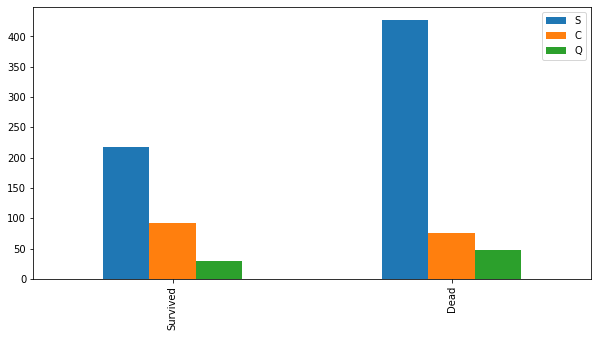

In [36]:
bar_chart('Embarked')

->> S에서 탑승한 사람들이 많이 죽음

### Age컬럼 데이터 결측치 채우기

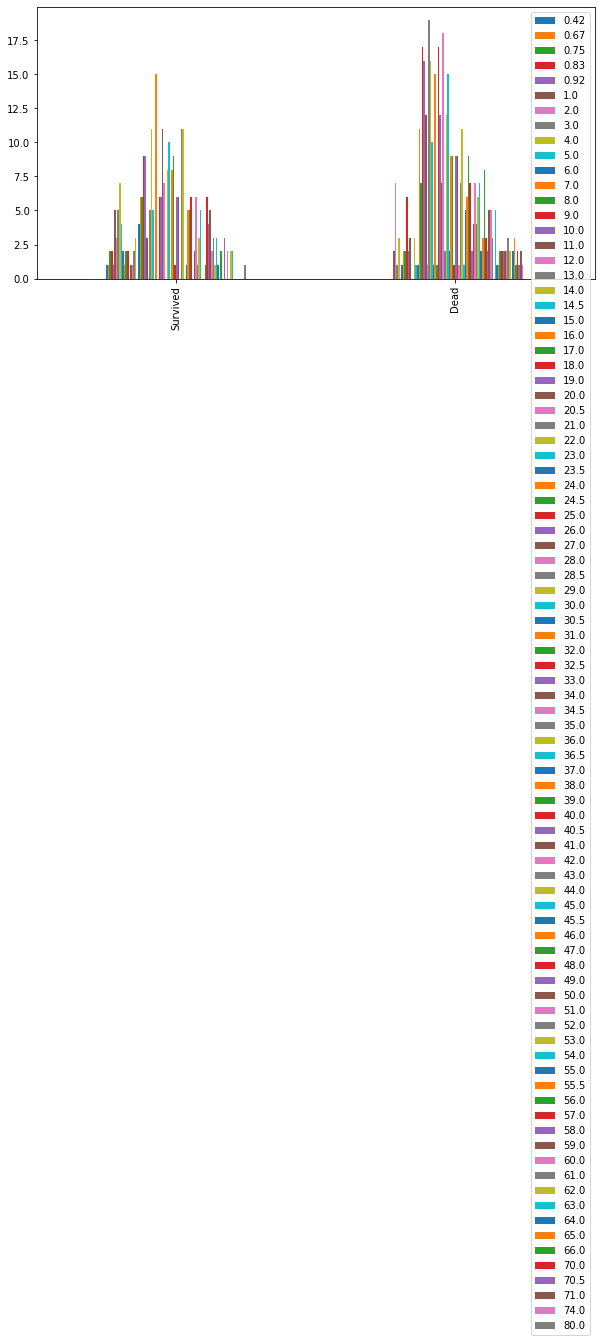

In [37]:
bar_chart('Age')
# 너무 보기 힘들기 때문에 전처리 필요

In [39]:
# Age가 결측치인 행들만 확인
train[train.loc[:,'Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


#### 어떻게 결측치 채우나?
- 중간값
- 최빈값
- 평균값
- 최소값

In [40]:
# 나이 결측치 데이터 프레임을 따로 떼어내서 나이와 성별만 확인
train_age = train[train['Age'].isnull()]
train_age[['Age','Sex']]

,Age,Sex
PassengerId,,
6,NaN,male
18,NaN,male
20,NaN,female
27,NaN,male
29,NaN,female
...,...,...
860,NaN,male
864,NaN,female
869,NaN,male


In [43]:
# 1. 평균값

# groupby(컬럼명) 함수 : 컬럼을 기준으로 데이터 그룹화
print(train.groupby('Sex').size())

# 성별을 기준으로 그룹화하고 Age컬럼에서 평균 구하기
print(train.groupby('Sex')['Age'].mean())

Sex
female    314
male      577
dtype: int64
Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


In [44]:
# 2. 중간값

print(train.groupby('Sex')['Age'].median())

Sex
female    27.0
male      29.0
Name: Age, dtype: float64


In [47]:
# 결측치를 중간값으로 채움

train['Age'] = train['Age'].fillna(train.groupby('Sex')['Age'].transform("median"))

In [49]:
# Age에 결측치 더 이상 없음을 확인
#train.info()
train[train.loc[:,'Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


많은 결측치를 채우고 난 뒤에는 카테고리화를 하여 범주를 줄여준다.

In [53]:
# # Age 컬럼의 카테고리화(그룹화)
# # bin으로 범위를 지정
bins = [0, 15, 25, 35, 60, 99] #pd.cut 0~15, 15~25, 25~35, 35~60, 60~99
label = ['0', '1', '2', '3', '4'] # 범위가 5개 이므로 0,1,2,3,4로 범위를 라벨화
#                                     # 0~15 : 0, 15~25 : 1, 25~35 : 2, 35~60 : 3, 60~99 : 4

train_cut = pd.cut(train.loc[:,'Age'], bins, labels = label)

train['Age'] = train_cut
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S


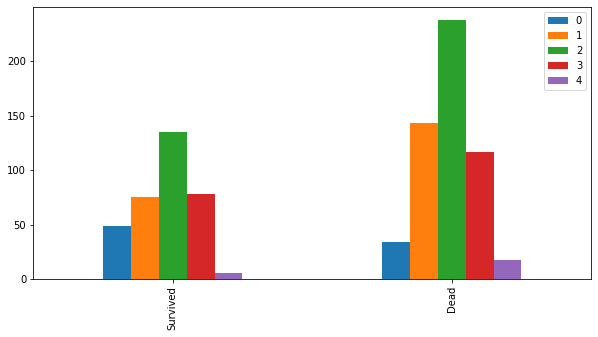

In [54]:
bar_chart('Age')

### Embarked 데이터 채우기

In [66]:
# 결측치 2개 뿐
# 둘 다 모두 여자(아까 남자가 더 많이 죽었었으니까 여자는 생존 확률이 더 높음)

train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,3,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,4,0,0,113572,80.0,B28,NaN


#### Embarked
- 최빈값
- 검색

In [68]:
# Pclass가 1인 사람이 가장 적게 사망했기 때문에 Pclass가 1인 사람 중에서 빈도수 파악
train[train['Pclass'] == 1].loc[:,'Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [69]:
train['Embarked'] = train['Embarked'].fillna('S')

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    category
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  891 non-null    object  
dtypes: category(1), float64(1), int64(4), object(5)
memory usage: 77.6+ KB


In [74]:
# 성별도 숫자로 바꿔줌. 남자는0 여자는1
train.loc[train['Sex'] == 'female','Sex'] = 1
train.loc[train['Sex'] == 'male', 'Sex'] = 0

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S


In [75]:
# Embarked도 숫자로 바꿔줌
train.loc[train['Embarked'] == 'S', 'Embarked'] = 0
train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0
5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0


In [76]:
# 새로운 컬럼 -- familysize
# 가족 구성원 + 1(나 포함)

train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1,2
3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,NaN,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,2
5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1


In [77]:
# 총 12개 컬럼 중 분석에 사용할 컬럼 선택
feature = ['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize']
X_train = train[feature]
X_train.head()

,Pclass,Sex,Age,Embarked,FamilySize
PassengerId,,,,,
1,3,0,1,0,2
2,1,1,3,1,2
3,3,1,2,0,1
4,1,1,2,0,2
5,3,0,2,0,1


In [78]:
# 정답
y_train = train['Survived']
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

#### test 데이터

In [79]:
test = pd.read_csv('data/test.csv', index_col = 'PassengerId')
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [80]:
# Age 결측치, FamilySize 컬럼 만들기, Age카테고리화, Sex, Embarked 매핑 필요
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [81]:
test.groupby('Sex')['Age'].median()

Sex
female    27.0
male      27.0
Name: Age, dtype: float64

In [82]:
test['Age'] = test['Age'].fillna(test.groupby('Sex')['Age'].transform('median'))

In [84]:
# Age 카테고리화
bins = [0, 15, 25, 35, 60, 99]
label = ['0', '1', '2', '3', '4']

test_cut = pd.cut(test.loc[:,'Age'], bins, labels = label)

test['Age'] = test_cut
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,2,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,3,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,4,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,2,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,1,3101298,12.2875,NaN,S


In [85]:
# 성별 매핑
test.loc[test['Sex'] == 'female', 'Sex'] = 1 
test.loc[test['Sex'] == 'male', 'Sex'] = 0 

In [86]:
# Embarked(승선장소) 매핑
test.loc[test['Embarked'] == 'S', 'Embarked'] = 0
test.loc[test['Embarked'] == 'C', 'Embarked'] = 1
test.loc[test['Embarked'] == 'Q', 'Embarked'] = 2

In [87]:
# FamilySize 컬럼 추가
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [88]:
# 분석에 사용할 컬럼 선택
test_feature = ['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize']
X_test = test[test_feature]
X_test.head()

,Pclass,Sex,Age,Embarked,FamilySize
PassengerId,,,,,
892,3,0,2,2,1
893,3,1,3,0,2
894,2,0,4,2,1
895,3,0,2,0,1
896,3,1,1,0,3


In [93]:
# 머신러닝 맛보기 sklearn
# 위에서 분류한 X_train과 y_train으로 학습을 시킴
# 모델 공부는 다음부터!

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [95]:
# 학습한 것을 기반으로 X_test 데이터를 통해 예측!
predict = model.predict(X_test)
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,